In [67]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general
pd.set_option('display.max_columns', None)
plt.style.use('default')

# Carga de los archivos Excel desde la carpeta databases
# método read_excel() lee un archivo de Excel (.xlsx) y devuelve un DataFrame
clientes = pd.read_excel("databases/Clientes.xlsx")
productos = pd.read_excel("databases/Productos.xlsx")
ventas = pd.read_excel("databases/Ventas.xlsx")
detalle_ventas = pd.read_excel("databases/Detalle_ventas.xlsx")

# Revisión general de las dimensiones
# atributo shape devuelve (número de filas, número de columnas)
print("Clientes:", clientes.shape)
print("Productos:", productos.shape)
print("Ventas:", ventas.shape)
print("Detalle ventas:", detalle_ventas.shape)

# Verificación de valores nulos
# método isnull() identifica valores nulos; sum() los cuenta por columna
print("\nValores nulos por tabla:")
print("Clientes:\n", clientes.isnull().sum())
print("Productos:\n", productos.isnull().sum())
print("Ventas:\n", ventas.isnull().sum())
print("Detalle_ventas:\n", detalle_ventas.isnull().sum())

# Verificación de duplicados
# método duplicated() devuelve True si una fila está repetida
print("\nDuplicados por tabla:")
print("Clientes:", clientes.duplicated().sum())
print("Productos:", productos.duplicated().sum())
print("Ventas:", ventas.duplicated().sum())
print("Detalle_ventas:", detalle_ventas.duplicated().sum())

# Verificación de tipos de datos
# atributo dtypes muestra el tipo de dato de cada columna
print("\nTipos de datos por tabla:")
print("Clientes:\n", clientes.dtypes)
print("Productos:\n", productos.dtypes)
print("Ventas:\n", ventas.dtypes)
print("Detalle_ventas:\n", detalle_ventas.dtypes)


Clientes: (100, 5)
Productos: (100, 4)
Ventas: (120, 6)
Detalle ventas: (343, 6)

Valores nulos por tabla:
Clientes:
 id_cliente        0
nombre_cliente    0
email             0
ciudad            0
fecha_alta        0
dtype: int64
Productos:
 id_producto        0
nombre_producto    0
categoria          0
precio_unitario    0
dtype: int64
Ventas:
 id_venta          0
fecha             0
id_cliente        0
nombre_cliente    0
email             0
medio_pago        0
dtype: int64
Detalle_ventas:
 id_venta           0
id_producto        0
nombre_producto    0
cantidad           0
precio_unitario    0
importe            0
dtype: int64

Duplicados por tabla:
Clientes: 0
Productos: 0
Ventas: 0
Detalle_ventas: 0

Tipos de datos por tabla:
Clientes:
 id_cliente                 int64
nombre_cliente            object
email                     object
ciudad                    object
fecha_alta        datetime64[ns]
dtype: object
Productos:
 id_producto         int64
nombre_producto    object
categ

In [68]:
# Creación de una base de datos consolidada a partir de las cuatro fuentes originales
# método concat() une DataFrames verticalmente (si tienen columnas compatibles)
bases = [clientes, productos, ventas, detalle_ventas]
consolidada = pd.concat(bases, axis=1)

# Exportación de la base consolidada inicial
# método to_csv() guarda un DataFrame en formato CSV
consolidada.to_csv("databases/base_compacta.csv", index=False, encoding="utf-8")

# Lectura del CSV generado para confirmar su creación
# método read_csv() lee un archivo CSV y devuelve un DataFrame
base_compacta = pd.read_csv("databases/base_compacta.csv")

# método head() muestra las primeras 5 filas
print("Vista previa de la base compacta:")
print(base_compacta.head())


Vista previa de la base compacta:
   id_cliente   nombre_cliente                     email      ciudad  \
0         1.0    Mariana Lopez    mariana.lopez@mail.com  Carlos Paz   
1         2.0    Nicolas Rojas    nicolas.rojas@mail.com  Carlos Paz   
2         3.0  Hernan Martinez  hernan.martinez@mail.com  Rio Cuarto   
3         4.0     Uma Martinez     uma.martinez@mail.com  Carlos Paz   
4         5.0  Agustina Flores  agustina.flores@mail.com     Cordoba   

   fecha_alta  id_producto     nombre_producto  categoria  precio_unitario  \
0  2023-01-01          1.0      Coca Cola 1.5L  Alimentos           2347.0   
1  2023-01-02          2.0          Pepsi 1.5L   Limpieza           4973.0   
2  2023-01-03          3.0         Sprite 1.5L  Alimentos           4964.0   
3  2023-01-04          4.0  Fanta Naranja 1.5L   Limpieza           2033.0   
4  2023-01-05          5.0  Agua Mineral 500ml  Alimentos           4777.0   

   id_venta       fecha  id_cliente.1  nombre_cliente.1  \
0    

In [69]:
# detalle_ventas + productos
# método merge() combina dos DataFrames según una columna común
df = detalle_ventas.merge(productos, on="id_producto", suffixes=("", "_prod"))

# + ventas
df = df.merge(ventas, on="id_venta", suffixes=("", "_venta"))

# + clientes
df = df.merge(clientes, on="id_cliente", suffixes=("", "_cliente"))

# Selección de columnas relevantes
df = df[[
    "id_venta", "fecha", "ciudad", "medio_pago",
    "categoria", "nombre_producto", "cantidad",
    "precio_unitario", "importe"
]]

print("DataFrame final:", df.shape)
print(df.head())


DataFrame final: (343, 9)
   id_venta      fecha      ciudad medio_pago  categoria  \
0         1 2024-06-19  Carlos Paz    tarjeta   Limpieza   
1         2 2024-03-17  Rio Cuarto         qr   Limpieza   
2         2 2024-03-17  Rio Cuarto         qr  Alimentos   
3         2 2024-03-17  Rio Cuarto         qr   Limpieza   
4         2 2024-03-17  Rio Cuarto         qr   Limpieza   

         nombre_producto  cantidad  precio_unitario  importe  
0    Toallas Húmedas x50         1             2902     2902  
1  Aceitunas Negras 200g         5             2394    11970  
2     Helado Vainilla 1L         5              469     2345  
3           Fernet 750ml         2             4061     8122  
4  Medialunas de Manteca         1             2069     2069  


In [70]:
# 1 USD = 1405.06 ARS
tasa_cambio = 1405.06

# Creación de nuevas columnas con los valores convertidos a dólares
df["precio_unitario_usd"] = df["precio_unitario"] / tasa_cambio
df["importe_usd"] = df["importe"] / tasa_cambio

# Redondeo a dos decimales
# método round() redondea valores numéricos a un número definido de decimales
df["precio_unitario_usd"] = df["precio_unitario_usd"].round(2)
df["importe_usd"] = df["importe_usd"].round(2)

print("Conversión completada. Vista previa:")
print(df[["nombre_producto", "precio_unitario_usd", "importe_usd"]].head())


Conversión completada. Vista previa:
         nombre_producto  precio_unitario_usd  importe_usd
0    Toallas Húmedas x50                 2.07         2.07
1  Aceitunas Negras 200g                 1.70         8.52
2     Helado Vainilla 1L                 0.33         1.67
3           Fernet 750ml                 2.89         5.78
4  Medialunas de Manteca                 1.47         1.47


In [71]:
# Eliminación de las columnas originales en pesos y renombramiento de las nuevas
if "precio_unitario_usd" in df.columns and "importe_usd" in df.columns:
    df = df.drop(columns=["precio_unitario", "importe"])
    df = df.rename(columns={
        "precio_unitario_usd": "precio_unitario",
        "importe_usd": "importe"
    })
    print("Columnas 'precio_unitario' e 'importe' reemplazadas por sus equivalentes en USD.")
else:
    print("No existen columnas en USD. Asegúrate de ejecutar primero el bloque 4.")

# Exportación del DataFrame final a CSV
df.to_csv("databases/base_procesada_usd.csv", index=False, encoding="utf-8")

# Lectura del archivo generado para confirmar su creación
base_usd = pd.read_csv("databases/base_procesada_usd.csv")

print("\nVista previa de la base procesada en USD:")
print(base_usd.head())


Columnas 'precio_unitario' e 'importe' reemplazadas por sus equivalentes en USD.

Vista previa de la base procesada en USD:
   id_venta       fecha      ciudad medio_pago  categoria  \
0         1  2024-06-19  Carlos Paz    tarjeta   Limpieza   
1         2  2024-03-17  Rio Cuarto         qr   Limpieza   
2         2  2024-03-17  Rio Cuarto         qr  Alimentos   
3         2  2024-03-17  Rio Cuarto         qr   Limpieza   
4         2  2024-03-17  Rio Cuarto         qr   Limpieza   

         nombre_producto  cantidad  precio_unitario  importe  
0    Toallas Húmedas x50         1             2.07     2.07  
1  Aceitunas Negras 200g         5             1.70     8.52  
2     Helado Vainilla 1L         5             0.33     1.67  
3           Fernet 750ml         2             2.89     5.78  
4  Medialunas de Manteca         1             1.47     1.47  


In [72]:
# método describe() devuelve estadísticas básicas de las columnas numéricas
print("Estadísticas descriptivas generales:")
print(df.describe())


Estadísticas descriptivas generales:
         id_venta                          fecha    cantidad  precio_unitario  \
count  343.000000                            343  343.000000       343.000000   
mean    61.492711  2024-03-30 14:12:14.693877504    2.962099         1.888892   
min      1.000000            2024-01-02 00:00:00    1.000000         0.190000   
25%     31.000000            2024-02-10 12:00:00    2.000000         1.150000   
50%     61.000000            2024-03-26 00:00:00    3.000000         1.790000   
75%     93.000000            2024-05-21 00:00:00    4.000000         2.760000   
max    120.000000            2024-06-28 00:00:00    5.000000         3.550000   
std     34.835525                            NaN    1.366375         0.931684   

          importe  
count  343.000000  
mean     5.501399  
min      0.190000  
25%      2.480000  
50%      4.770000  
75%      7.285000  
max     17.700000  
std      3.747324  


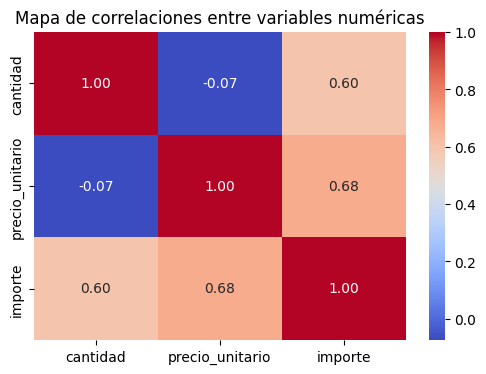

In [77]:
# método corr() calcula la correlación entre variables numéricas
corr = df[["cantidad", "precio_unitario", "importe"]].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlaciones entre variables numéricas")
plt.show()


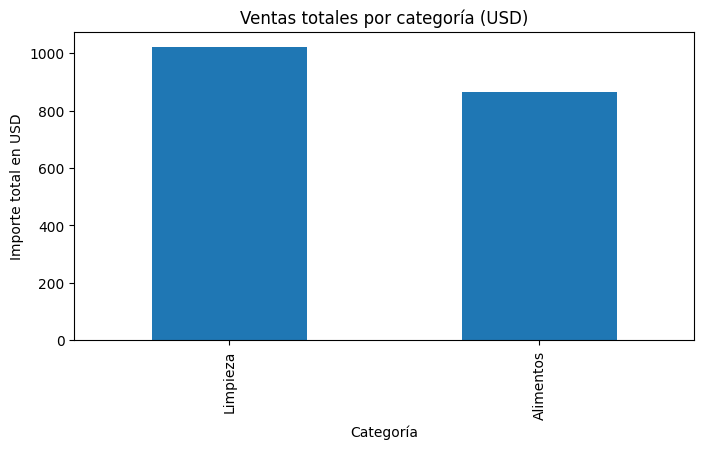

In [78]:
# método groupby() agrupa los datos según una variable categórica
ventas_categoria = df.groupby("categoria")["importe"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
ventas_categoria.plot(kind="bar")
plt.title("Ventas totales por categoría (USD)")
plt.xlabel("Categoría")
plt.ylabel("Importe total en USD")
plt.show()


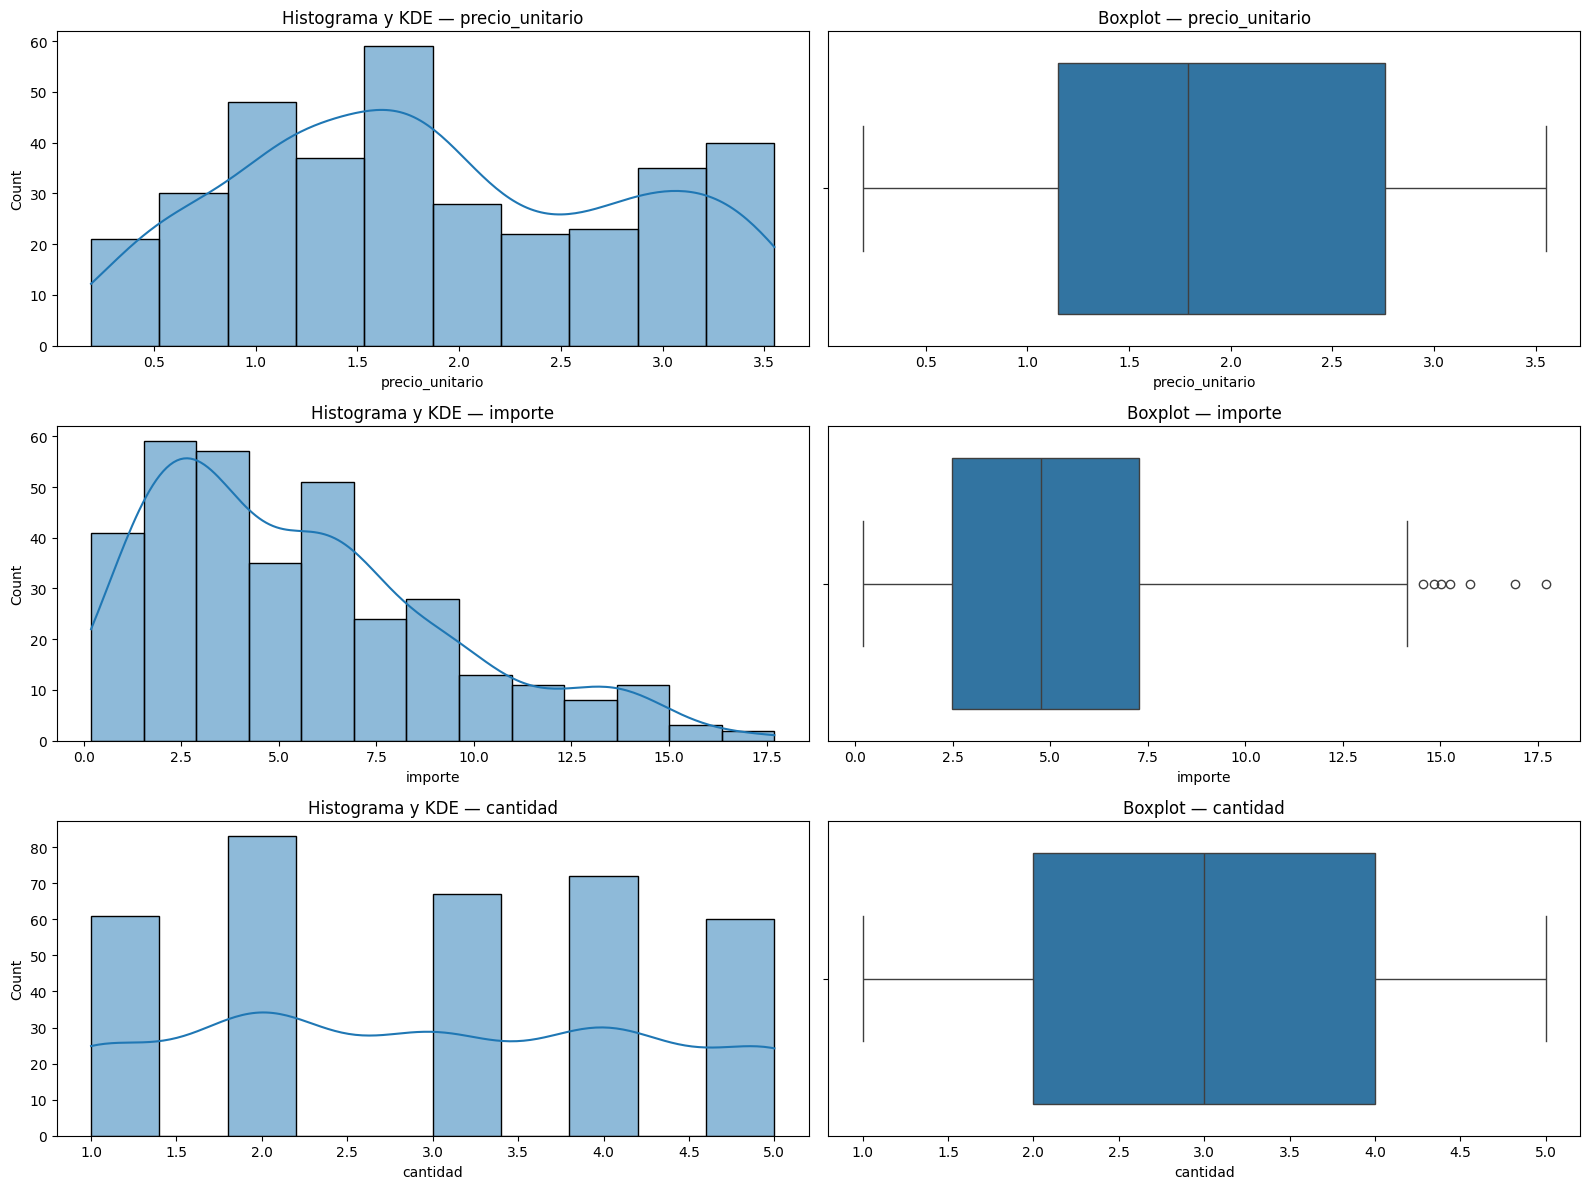

In [80]:
# Distribuciones y boxplots (variables numéricas)
# método histplot() de seaborn grafica histogramas con KDE opcional
# método boxplot() de seaborn muestra la distribución y outliers
num_vars = ["precio_unitario", "importe", "cantidad"]

# Comprobar que las columnas existan
num_vars = [c for c in num_vars if c in df.columns]

if len(num_vars) == 0:
    print("No se encontraron columnas numéricas para graficar.")
else:
    plt.figure(figsize=(16, 4 * len(num_vars)))
    for i, col in enumerate(num_vars, 1):
        plt.subplot(len(num_vars), 2, 2*i - 1)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f"Histograma y KDE — {col}")
        plt.xlabel(col)

        plt.subplot(len(num_vars), 2, 2*i)
        sns.boxplot(x=df[col].dropna())
        plt.title(f"Boxplot — {col}")
        plt.xlabel(col)
    plt.tight_layout()
    plt.show()


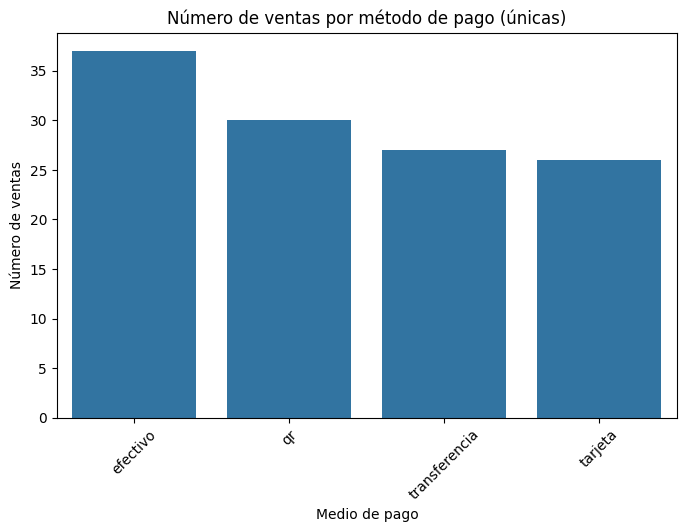

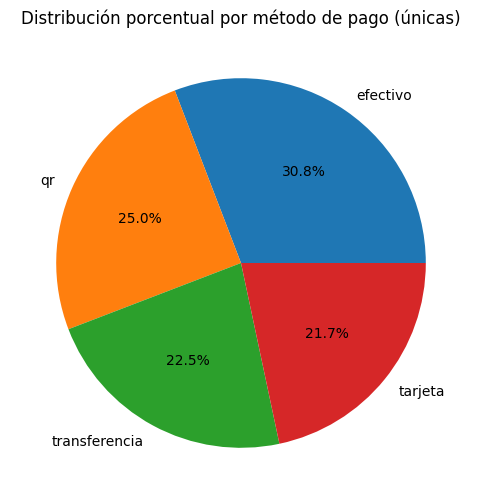

In [84]:
# Distribución por método de pago (a nivel de venta)
if "id_venta" in df.columns and "medio_pago" in df.columns:
    # Agrupar por id_venta y quedarse con un método de pago único
    pagos_por_venta = df[["id_venta", "medio_pago"]].drop_duplicates(subset=["id_venta"])

    # método value_counts() cuenta cuántas ventas hubo por método de pago
    pagos = pagos_por_venta["medio_pago"].value_counts(dropna=False)

    plt.figure(figsize=(8,5))
    sns.barplot(x=pagos.index, y=pagos.values)
    plt.title("Número de ventas por método de pago (únicas)")
    plt.xlabel("Medio de pago")
    plt.ylabel("Número de ventas")
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico circular con porcentajes
    plt.figure(figsize=(6,6))
    pagos.plot.pie(autopct="%1.1f%%")
    plt.ylabel("")
    plt.title("Distribución porcentual por método de pago (únicas)")
    plt.show()

else:
    print("Faltan columnas 'id_venta' o 'medio_pago' en el DataFrame.")


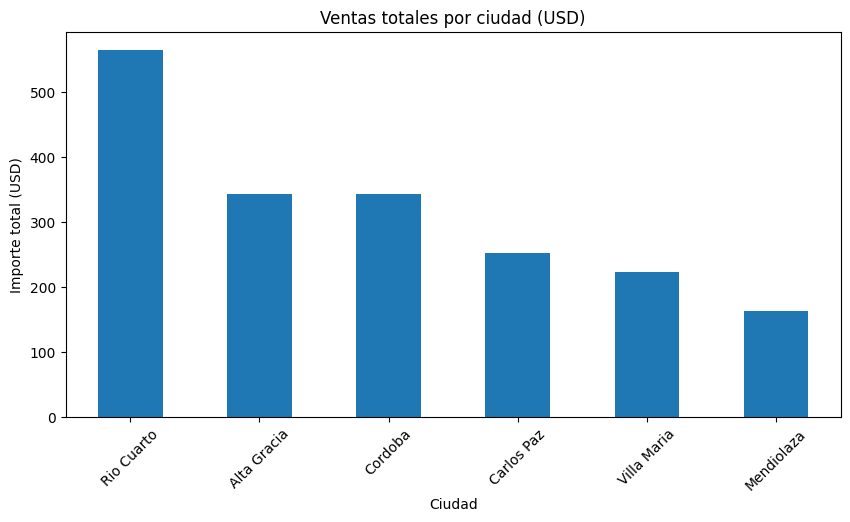

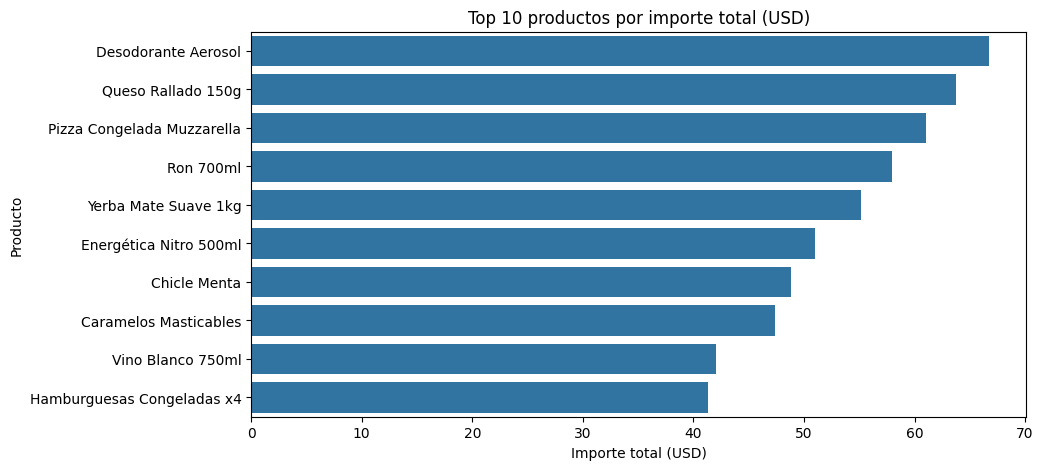

In [82]:
# Ventas por ciudad y top 10 productos
# método groupby() agrupa y sum() agrega; head() para top-N
if "ciudad" in df.columns and "importe" in df.columns:
    ventas_ciudad = df.groupby("ciudad")["importe"].sum().sort_values(ascending=False)
    plt.figure(figsize=(10,5))
    ventas_ciudad.plot(kind="bar")
    plt.title("Ventas totales por ciudad (USD)")
    plt.xlabel("Ciudad")
    plt.ylabel("Importe total (USD)")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Falta 'ciudad' o 'importe' en el DataFrame.")

# Top productos por importe
if "nombre_producto" in df.columns and "importe" in df.columns:
    top_products = df.groupby("nombre_producto")["importe"].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_products.values, y=top_products.index)
    plt.title("Top 10 productos por importe total (USD)")
    plt.xlabel("Importe total (USD)")
    plt.ylabel("Producto")
    plt.show()
else:
    print("Falta 'nombre_producto' o 'importe' en el DataFrame.")


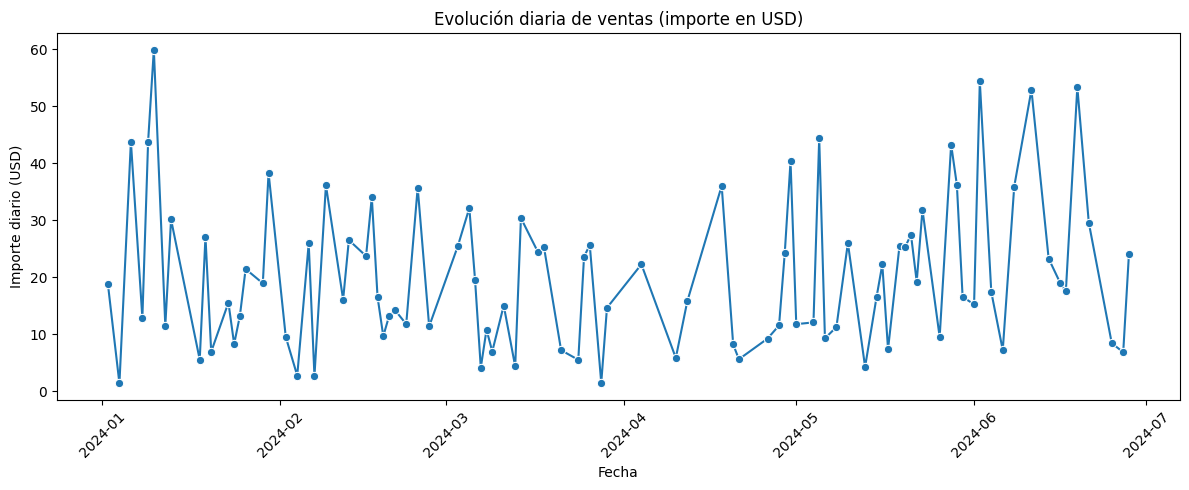

In [83]:
# Evolución temporal de ventas (serie temporal)
# Asegurarse que 'fecha' sea tipo datetime para agrupar por periodo
if "fecha" in df.columns and "importe" in df.columns:
    if not np.issubdtype(df["fecha"].dtype, np.datetime64):
        df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")
    df_fecha = df.dropna(subset=["fecha"])
    ventas_diarias = df_fecha.groupby("fecha")["importe"].sum().reset_index()
    plt.figure(figsize=(12,5))
    sns.lineplot(data=ventas_diarias, x="fecha", y="importe", marker="o")
    plt.title("Evolución diaria de ventas (importe en USD)")
    plt.xlabel("Fecha")
    plt.ylabel("Importe diario (USD)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Falta 'fecha' o 'importe' en el DataFrame.")
